/tmp/ipykernel_13992/370564101.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


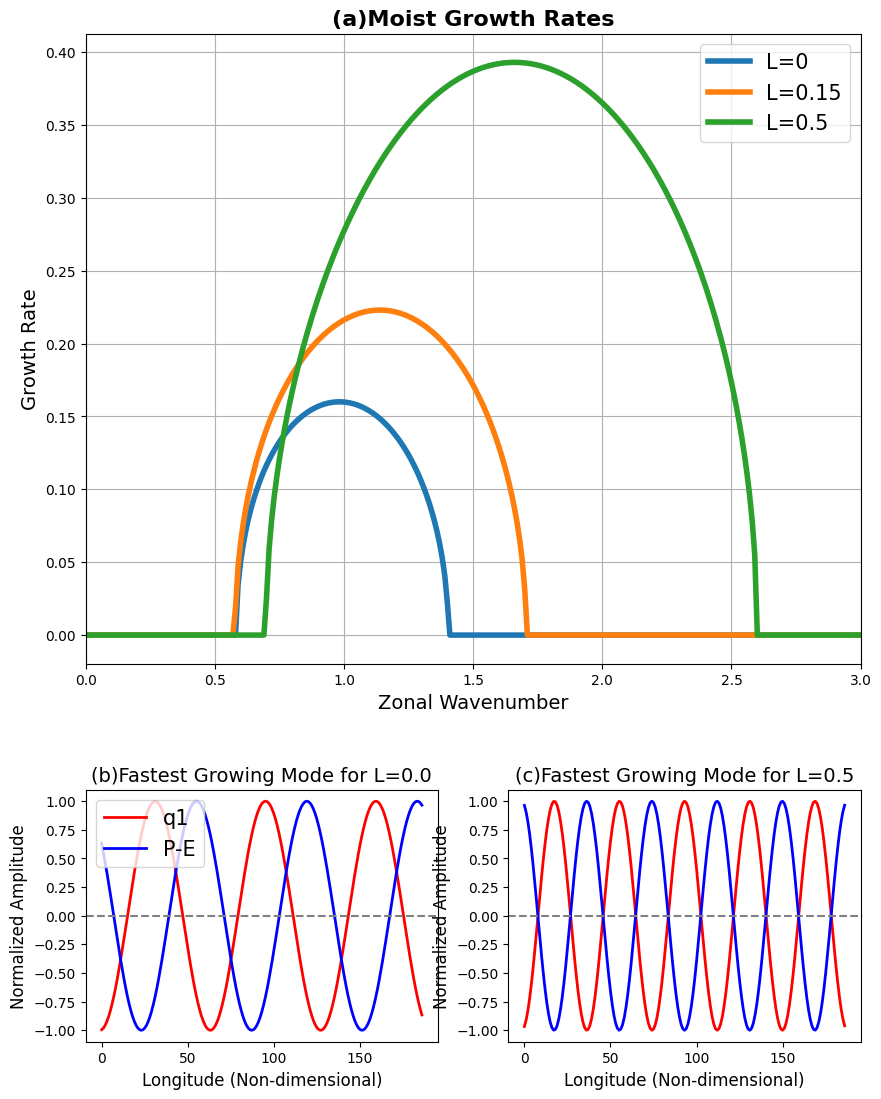

In [7]:
import numpy as np
from scipy.linalg import eig
import matplotlib.pyplot as plt
from moist_growth_matrix import *

#We select the desired upper-level and lower-level winds
U1=1
U2=0.4

#We choose our latent heating parameter #!!L=0 will return errors!!#
L=0.0001
kk,growth_dry,q_1_prime_dry,P_dry = moist_matrix(L,U1,U2)
L=0.15
kk,growth_mid,q_1_prime_mid,P_mid = moist_matrix(L,U1,U2)
L=0.5
kk,growth_moist,q_1_prime_moist,P_moist = moist_matrix(L,U1,U2)


#Plot the results
fig = plt.figure(figsize=(10, 18))
grid = plt.GridSpec(4, 2, hspace=0.5, wspace=0.2)

# Large plot on top
ax_main = fig.add_subplot(grid[:2, :])
ax_main.plot(kk, growth_dry, linestyle='-', label='L=0', linewidth=4)
ax_main.plot(kk, growth_mid, linestyle='-', label='L=0.15', linewidth=4)
ax_main.plot(kk, growth_moist, linestyle='-', label='L=0.5', linewidth=4)
ax_main.set_title('(a)Moist Growth Rates', fontsize=16, fontweight='bold')
ax_main.legend(fontsize=15)
ax_main.grid(True)
ax_main.set_xlabel('Zonal Wavenumber', fontsize=14)
ax_main.set_ylabel('Growth Rate', fontsize=14)
ax_main.set_xlim(0,3)

# Smaller plots below
titles = [
    '(b)Fastest Growing Mode for L=0.0', '(c)Fastest Growing Mode for L=0.5',
]

files = [
    'dry', 'moist',
]

for i, title in enumerate(titles):
    P_at_max_growth = locals()[f"P_{files[i]}"][1:-1]
    q1 = locals()[f"q_1_prime_{files[i]}"][1:-1]

    ax = fig.add_subplot(grid[2 + i // 2, i % 2])
    ax.plot(q1 / np.max(np.abs(q1)), label="q1", color='red', linewidth=2)
    ax.plot(P_at_max_growth / np.max(np.abs(P_at_max_growth)), label="P-E", color='blue', linewidth=2)
    ax.set_title(title, fontsize=14)
    ax.axhline(0, color='gray', linestyle='--')

    ax.set_ylabel('Normalized Amplitude', fontsize=12)
    ax.set_xlabel('Longitude (Non-dimensional)', fontsize=12)
    if i ==0:
        
        ax.legend(fontsize=15, loc='upper left')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

